# Algoritmo de Deutsch-Jozsa

O algoritmo de Deutsch-Jozsa é um algoritmo quântico desenvolvido pelo físico David Deutsch e pelo matemático Richard Jozsa.
Foi o primeiro algoritmo a resolver um problema mais rápido que um computador clássico, apresentando uma melhoria exponencial.

### Definição do problema
Nos é dada uma função $f:\{0,1\}^n \rightarrow \{0,1\} $ que recebe uma string de bits como input e devolve $0$ ou $1$ como output. É garantido que a função $f$ seja sempre constante, isto é, para qualquer input a função retorna apenas $0$ ou apenas $1$, ou balanceada, a função retorna $0$ para exatamente metade dos inputs e $1$ para a outra metade. O objetivo do algoritmo é definir se a função é constante ou balanceada.

### Solução clássica
No melhor caso a solução clássica necessitaria apenas 2 chamadas da função $f(x)$ para solucionar o problema, assumindo que a função fosse balanceade, por exemplo: Se $f(00\cdots0) \rightarrow 1$ e $f(00\cdots1) \rightarrow 0$ então a função é balanceade.
No pior caso cada chamada da função retornaria o mesmo número até chega na chamada $2^{n-1}+1$ onde a função seria definida como constante caso retornasse o mesmo valor que as chamadas anteriores ou balanceada caso o retorno fosse diferente.

No caso de outputs repetidos em sequência, cada chamada aumenta a probabilidade da função ser constante, mas para afirmar com 100% de certeza as $2^{n-1}+1$ devem ser feitas.


### Solução Quântica


O algoritmo de Deutsch-Jozsa provê uma maneira de resolver o problema com 100% de certeza com apenas 1 chamada de função, no entanto é necessário implementar a função dentro de um oraculo que mapeia o estado $|x\rangle|y\rangle$ para $|x\rangle|y\oplus f(x)\rangle$ 

<img src="Deutsch-Jozsa-algorithm-quantum-circuit.png">

## O Algoritmo

O algoritmo inicia preparando o estado quântico inicial de $n+1$ bits quânticos, os n primeiros qubits no estado $|0\rangle$ e o ultimo no estado $|1\rangle$

$1.\quad|0\rangle^{\otimes \, n}|1\rangle$

Em seguida aplica-se uma porta Hadamard é aplicada sobre todos os qubits, atingido o estado:

$2.\quad\rightarrow\frac{1}{\sqrt{2^{n}}}\sum_{x=0}^{2^n-1} |x\rangle \Big[\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big]$

Depois é aplicada a função $f(x)$ implementada no oráculo do circuito, que mapeia o input $|x\rangle|y\rangle$ para $|x\rangle|y\oplus f(x)\rangle$, e após avaliação de todos os casos possíveis de $|x\rangle$ e aplicando a soma módulo 2 ($\oplus$) sobre $|y\rangle$, vemos o seguinte estado:

$3.\quad\rightarrow\sum_{x} (-1)^{f(x)} |x\rangle \Big[\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big]$

Então, aplicamos a porta Hadarmad mais uma vez, apenas para os n primeiros qubits, botendo o estado:

$4.\quad\rightarrow\frac{1}{2^n}\sum_{z}\sum_{x} \frac{(-1)^{x\cdot z + f(x)}|z\rangle}{\sqrt{2^n}} \Big[\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big] $

onde $x\cdot z$ é o produto interno de $x$ e $z$ ou seja, $x\cdot y=x_0 y_0\oplus x_1 y_1\oplus\cdots\oplus x_{n-1} y_{n-1} $

$5.\quad z $

Por fim, fazemos a medição dos n primeiros bits, obtendo resultado 1 para todos eles caso a função seja constante e 0 se for balanceado

## O Algoritmo


$1.\quad|0\rangle^{\otimes \, n}|1\rangle$

$2.\quad\rightarrow\frac{1}{\sqrt{2^{n}}}\sum_{x=0}^{2^n-1} |x\rangle \Big[\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big]$

$3.\quad\rightarrow\sum_{x} (-1)^{f(x)} |x\rangle \Big[\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big]$

$4.\quad\rightarrow\frac{1}{2^n}\sum_{z}\sum_{x} \frac{(-1)^{x\cdot z + f(x)}|z\rangle}{\sqrt{2^n}} \Big[\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big] $

$5.\quad z $


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import QuantumCircuit 
from qiskit import ClassicalRegister 
from qiskit import QuantumRegister 
from qiskit import BasicAer, execute 
from qiskit.tools.visualization import * 

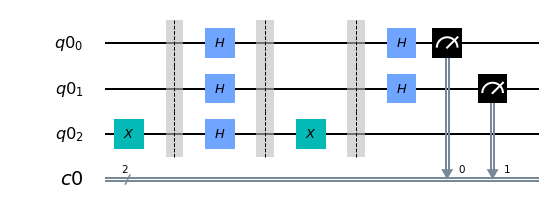

In [4]:
rq = QuantumRegister(3)
rc = ClassicalRegister(2)

circuito = QuantumCircuit(rq, rc)

circuito.x(rq[2])

circuito.barrier()

circuito.h(rq[0])
circuito.h(rq[1])
circuito.h(rq[2])

circuito.barrier()

circuito.x(rq[2])

circuito.barrier()

circuito.h(rq[0])
circuito.h(rq[1])

circuito.measure(rq[0],rc[0])
circuito.measure(rq[1],rc[1])

circuito.draw(output='mpl')